# Big Ol Database Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for Big Ol Database in 2023 is 43544.6750 dollars. It is operating at a loss, with total net profit at -2869.2156 dollars. This put Big Ol Database's profit margin at -7.7 %.
>* From January to March, revenue growth had been largely negative (-94% CMGR in February). Growth never quite happen, as a positive growth on one month will be offset by negative growth the following month. By December the CMGR is around -10.3% growth. On average, CMGR is around 0.12%.
>* On average, Big Ol Database have around 13 users each month, with 2.6 being active. There is a 97.27% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* In general, there is no user activity for all cohorts beyond the initial purchase. August cohort is missing/have no purchase at all. User retention rates is 0%, NDR is 0%, for all cohorts.
>* On a per customer basis, the highest revenue is around 2.3k per user, from the April cohort (2 users). Profit-wise, 670.60 is the highest per user, from the June cohort (3 users).
>* Profit-wise, December, November, and April cohorts contribute to losses on a per user basis. With April cohort (the highest revenue per user) marking the highest loss per user, at -1519.99. 
>
>Profitability
>* Pre-discounts, Big Ol Database shows generally positive profits in most months. Highest profit month (October) recorded a significant overall profit of 2165.3251, indicating strong performance during that period. Other noticable peaks are January (1493.2018) and June (1911.7561).
>* April stands out as an outlier with a negative profit of -294.9949, the only month with a negative total pre-discounts. April is confirmed to have a significant net loss due to the large discount applied to a FedEx order (70% discounts). Margin of loss was very high, causing an overall net loss even before considering the discounts. 
>
>Discounting EDA
>* There are 33 orders for Big Ol Database in 2023, 26 of which were applied discounts (~79%). Significant number of orders are discounted in the lower discount ranges (10-20%) and higher discount ranges (50-70%). Reliance on discounts ranging from 10% to 70%, indicate struggles to generate demand at full price. 
>* Some months like June (1834.5961) and October (1671.5036) managed to maintain positive profits even after discounts.
>* Severe negative impacts on profits due to discounts, turning potential positive outcomes into substantial losses. April (-3039.98) and November (-4495.83) experienced extreme losses from discounts, turning potential positive profits into significant losses.
>* 0-20% discount orders generally result in positive profits, though the limited number of orders suggests constrained sales. Enhancing product value could encourage purchases with lower discounts.
>
>Ideal Customer Profile (ICP) EDA
>* To maximize overall business performance, prioritize the Strategic segment (63.12% Net Revenue, 63.89% Sales, -2,168.38 Net Profit) by optimizing cost management and pricing; enhance the Enterprise segment (37.19% Quantity, 2,019 Net Profit before discount, -966.29 Net Profit) for profitability; and continue supporting the efficient SMB segment (8.91% Net Revenue, 8.68% Sales, 265.46 Net Profit) for steady growth. 
>* In the Strategic segment, Energy industries in EMEA and AMER are the highest-performing. These industries are vital for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations. To address the Strategic segment losses, minimize discounting in EMEA's Retail, AMER's Tech, and Manufacturing in EMEA and APJ.
>* For the Enterprise segment, Misc industries in EMEA and Tech industries in AMER are top-performing. To address the Enterprise segment losses, minimize discounting in EMEA's Transportation industry and AMER's Manufacturing industry.
>* In the SMB segment, Finance industries in AMER stands out.
>* All regions have strong sales periods but suffer profit declines due to heavy discounting. They also experience inactivity in certain months from low product demand. 
>* AMER region shows robust sales in January, April, July, and November. However, profits decline significantly from September through November due to heavy discounting, with no sales activity in August and December. Among the other other regions it is the only region to have a positive net profit (937.9).
>* EMEA peaks in sales in June, October, and November but sees profits dive into negative territory in April, September, and especially November. There is also a notable inactivity in sales during February, March, May, July, and August.
>* In APJ August stands out with high sales but also significant profit decline, indicating heavy discounting. Most of the year, including January, February, April, May, June, October, November, and December, shows no sales activity, suggesting prolonged periods of inactivity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod5 = df.query("Product == 'Big Ol Database'")
# then slice product df by year of analysis
prod5_2023=prod5.query('year == 2023')

----

### General Performance Report

In [7]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod5_2023['reg_date'] = prod5_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_5928\3803952395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod5_2023['reg_date'] = prod5_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [8]:
# make a user df, from the product df
prod5_2023_user = prod5_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [9]:
# from user df, extract month datetime data, from date of first purchase
prod5_2023_user['reg_month']= prod5_2023_user['reg_date'].values.astype('datetime64[M]')

In [10]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod5_2023_user['key'] = 1
prod5_2023_user = template_table.merge(prod5_2023_user,on='key')
prod5_2023_user =prod5_2023_user.drop('key',axis=1)

In [11]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod5_2023_user = prod5_2023_user[prod5_2023_user['Month']>=prod5_2023_user['reg_month']]

In [12]:
prod5_2023['Month'] = prod5_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod5_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod5_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod5_2023_user = prod5_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod5_2023_user = prod5_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_5928\886213163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod5_2023['Month'] = prod5_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
prod5_2023_user['user'] = 1    
prod5_2023_user['new user'] = (prod5_2023_user['reg_month'] == prod5_2023_user['Month']) * 1 
prod5_2023_user['active'] = (prod5_2023_user['Sales'] > 0) * 1   
prod5_2023_user['active_prev'] = (prod5_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod5_2023_user['change_status'] = (prod5_2023_user['active'] != prod5_2023_user['active_prev']) * 1
prod5_2023_user['session_id'] = (prod5_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod5_2023_user['inactive'] = (prod5_2023_user['active'] == 0) * 1
prod5_2023_user['month_inactive'] = (prod5_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
#Big Ol Database monthly user report (2023)
prod5_2023_report = prod5_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod5_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,7.0000,3.0000,4106.6550,3417.7095,1493.2018,804.2563,3,3,3
2023-02-01,2.0000,1.0000,239.9840,191.9872,86.9942,38.9974,4,1,1
2023-03-01,4.0000,2.0000,742.7060,573.1662,231.8112,62.2714,6,2,2
2023-04-01,7.0000,2.0000,7349.9690,4604.9827,-294.9949,-3039.9812,8,2,2
2023-05-01,1.0000,1.0000,343.2000,274.5600,107.2500,38.6100,9,1,1
2023-06-01,16.0000,3.0000,3868.9600,3791.8000,1911.7561,1834.5961,12,3,3
2023-07-01,9.0000,2.0000,2992.3320,2274.4392,977.2338,259.3410,14,2,2
2023-08-01,3.0000,1.0000,1439.9820,863.9892,311.9961,-263.9967,14,0,1
2023-09-01,13.0000,4.0000,1576.5450,1163.0565,674.2970,260.8085,16,2,4


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [15]:
prod5_2023_churn = prod5_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod5_2023_churn['old active'] = (prod5_2023_churn['active'] - prod5_2023_churn['new user'])
prod5_2023_churn['user churn'] = ((1 - (prod5_2023_churn['old active'] / prod5_2023_churn['user'].shift(1))) * 100).round()
prod5_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,4106.6550,804.2563,3,3,3,0,NaN
2023-02-01,239.9840,38.9974,4,1,1,0,100.0000
2023-03-01,742.7060,62.2714,6,2,2,0,100.0000
2023-04-01,7349.9690,-3039.9812,8,2,2,0,100.0000
2023-05-01,343.2000,38.6100,9,1,1,0,100.0000
2023-06-01,3868.9600,1834.5961,12,3,3,0,100.0000
2023-07-01,2992.3320,259.3410,14,2,2,0,100.0000
2023-08-01,1439.9820,-263.9967,14,0,1,1,93.0000
2023-09-01,1576.5450,260.8085,16,2,4,2,86.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [37]:
prod5_2023_churn[["new user"]].mean()

new user   2.2500
dtype: float64

In [16]:
#monthly avg. user churn
prod5_2023_churn[["user", "active", "user churn"]].mean()

user         13.1667
active        2.6667
user churn   97.2727
dtype: float64

In [39]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report=pd.DataFrame(prod5_2023.groupby(['month'])[['Sales', 'net_profit']].sum()).reset_index()

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 4106.6550, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month difference'], axis=1)

#with pd.option_context('use_inf_as_na', True):
    #sales_report = sales_report.dropna(subset=['CMGR'], how='all')
    
sales_report


,month,Sales,net_profit,CMGR
0,1,4106.6550,804.2563,0.0000
1,2,239.9840,38.9974,-94.1562
2,3,742.7060,62.2714,-57.4730
3,4,7349.9690,-3039.9812,21.4132
4,5,343.2000,38.6100,-46.2331
5,6,3868.9600,1834.5961,-1.1854
6,7,2992.3320,259.3410,-5.1392
7,8,1439.9820,-263.9967,-13.9043
8,9,1576.5450,260.8085,-11.2788
9,10,7873.9950,1671.5036,7.5008


In [40]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

-1.3770499275581143

In [41]:
#The CMGR is skewed (negative), median is closest I can get to an average
sales_report['CMGR'].median()

-7.697545473941397

In [42]:
prod5_2023[['Sales', 'net_profit']].sum()

Sales        43544.6750
net_profit   -2869.2156
dtype: float64

In [43]:
# Total monthly profit margin
(-2869.2156/ 43544.6750) * 100


-6.589130817947314

In [44]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,-0.5631
net_profit,-0.5631,1.0000


**Key findings:**
1. On average, Big Ol Database have around 13 users each month, with 2.6 being active. There is a 97.27% likelihood of users churning in the next month. Number of accounts and quantity of purchases fluctuates (generally few), with big purchases in some months. On average, each month has 2 new users.
2. From January to March, revenue growth had been largely negative (-94% CMGR in February). Growth never quite happen, as a positive growth on one month will be offset by negative growth the following month. By December the CMGR is around -10.3% growth. On average, CMGR is around 0.12%.
3. Total revenue for Big Ol Database in 2023 is 43544.6750 dollars. It is operating at a loss, with total net profit at -2869.2156 dollars. This put Big Ol Database's profit margin at -7.7 %.
4. Based on total monthly data, increase in monthly revenue does not equal an increase in monthly profit. Using a correlation test, we can see that an increase in revenue means a decrease in profit. 

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod5_2023_user['date']=prod5_2023_user['Month'].dt.to_period('M')
prod5_2023_user['cohort']= prod5_2023_user['reg_month'].dt.to_period('M')
prod5_2023_user['lifetime'] = (prod5_2023_user['date'] - prod5_2023_user['cohort']).apply(attrgetter('n'))

In [16]:
prod5_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1016,Caterpillar,2023-01-03,2023-01-01,2.0000,695.7000,347.8500,320.0220,-27.8280,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1023,China National Petroleum,2023-01-08,2023-01-01,2.0000,3059.9820,2753.9838,985.9942,679.9960,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod5_cohort = prod5_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod5_cohort ['active rate'] = (prod5_cohort['active'] / prod5_cohort['user']) * 100
prod5_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,3,3,3,100.0000
1,2023-01-01,1,3,0,0,0.0000
2,2023-01-01,2,3,0,0,0.0000
3,2023-01-01,3,3,0,0,0.0000
4,2023-01-01,4,3,0,0,0.0000
...,...,...,...,...,...,...
68,2023-10-01,1,4,0,0,0.0000
69,2023-10-01,2,4,0,0,0.0000
70,2023-11-01,0,5,5,5,100.0000
71,2023-11-01,1,5,0,0,0.0000


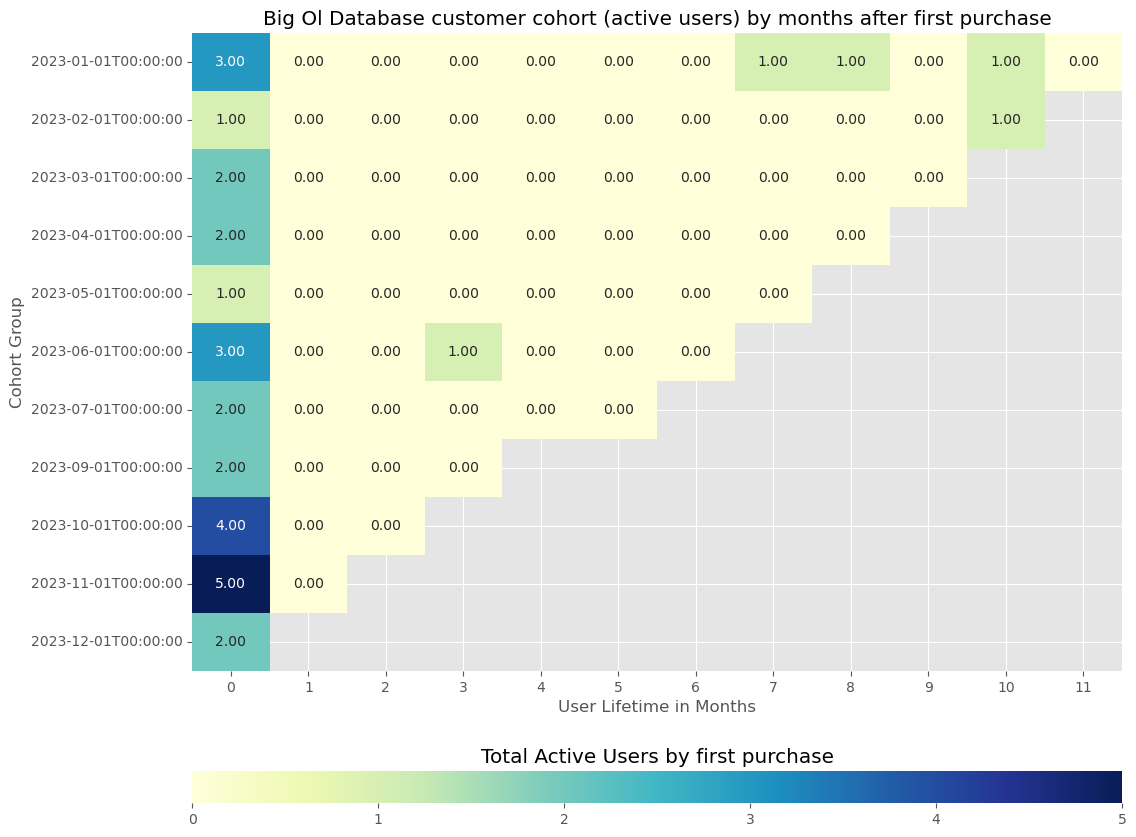

In [18]:
# customer cohort
pivot0 =prod5_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Big Ol Database customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- Overall, for all cohorts there's no activity beyond their initial purchase. August cohort doesn't even exist, as there is no active users even on the initial month.
- November cohort has the highest initial active users (5)

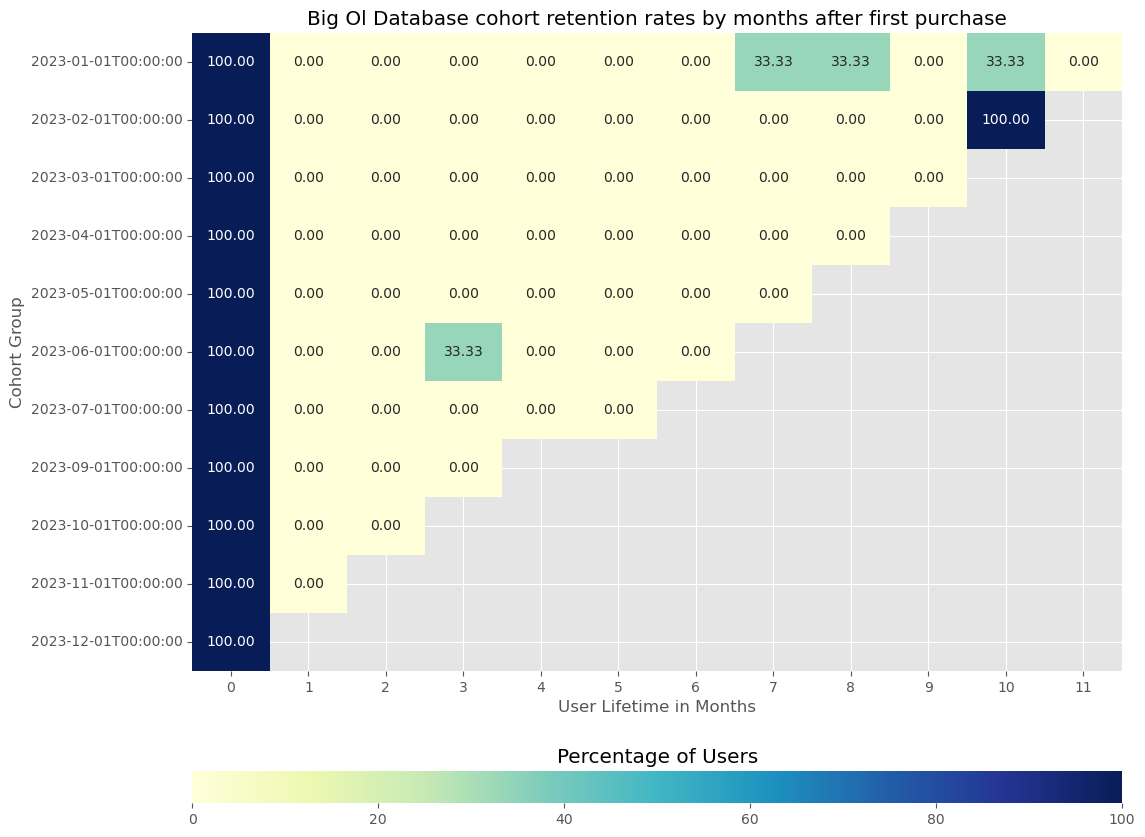

In [19]:
# customer retention
pivot1 =prod5_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Big Ol Database cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- As there is generally no activity beyond the initial purchase, general retention rates for all cohorts is 0% . 
- We can see January cohort having some retention rate starting from September, as 1 out of its initial 3 active users make a returning purchase (~33% retention rate).

C:\Users\arizk\AppData\Local\Temp\ipykernel_5316\1736838104.py:2: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.relplot(data=prod5_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

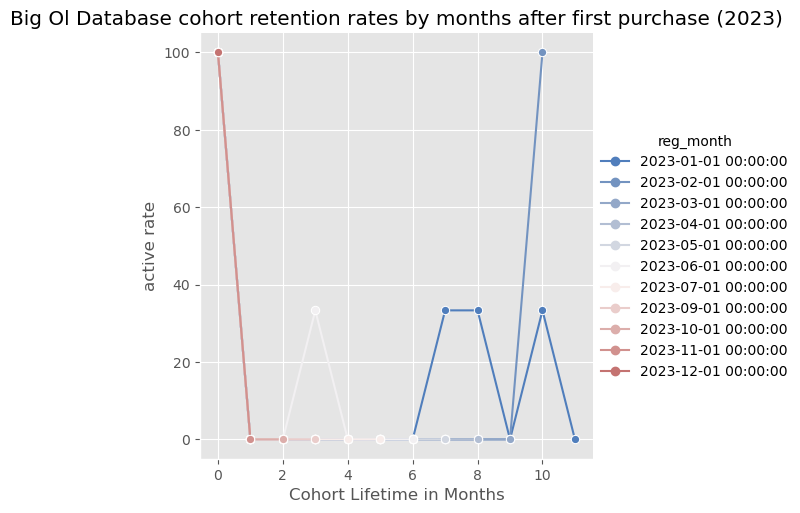

In [20]:
# retention rate lineplots
sns.relplot(data=prod5_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Big Ol Database cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [17]:
prod5_cohort2 =prod5_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

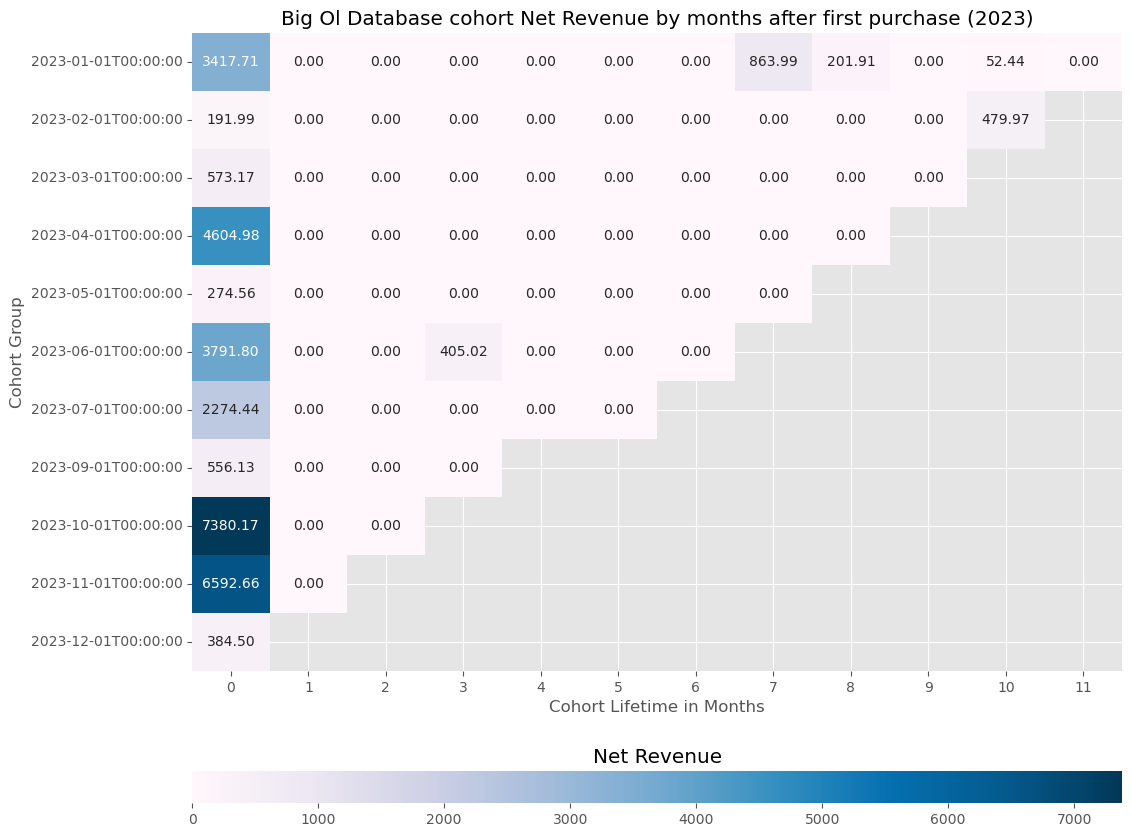

In [22]:
# Net Revenue by Cohort
pivot2 =prod5_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Big Ol Database cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- With generally no subsequent purchases, each cohort's net revenue value depends on the purchase in initial month. One (minor) exception is the January cohort, which had 3 subsequent purchases after the initial month.
- October cohort, who has 4 users in the initial month, has the highest initial purchase, at 7380.17
- November cohort, who has 5 users in the initial month, has the second highest initial purchase, at 6592.66.

In [18]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod5_2023_user.loc[prod5_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod5_cohort2 = prod5_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod5_cohort2 ['net dollar retention'] = (prod5_cohort2['discounted_sales'] / prod5_cohort2['ds_max']) * 100

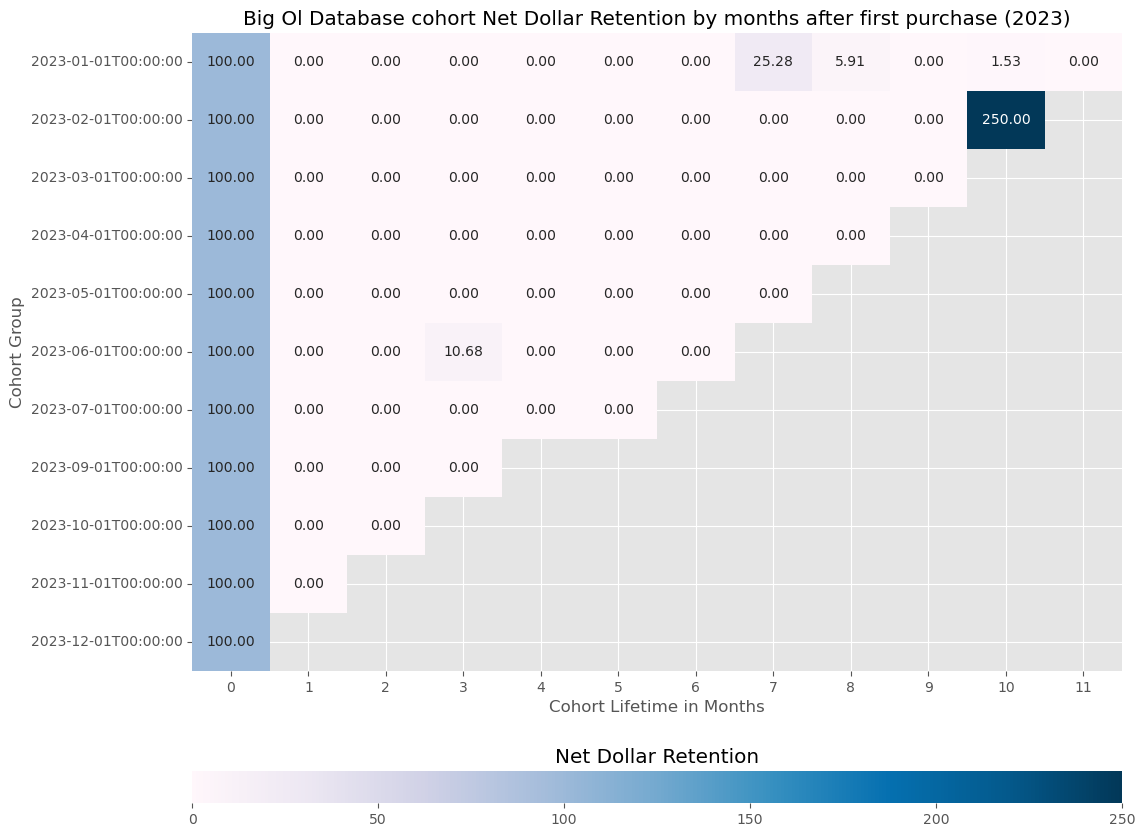

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod5_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Big Ol Database cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

- After its initial month's purchase, in all cohorts there is no subsequent purchases for Big Ol Database.  

In [19]:
prod5_cohort2 ['cumulative lifetime revenue'] = prod5_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

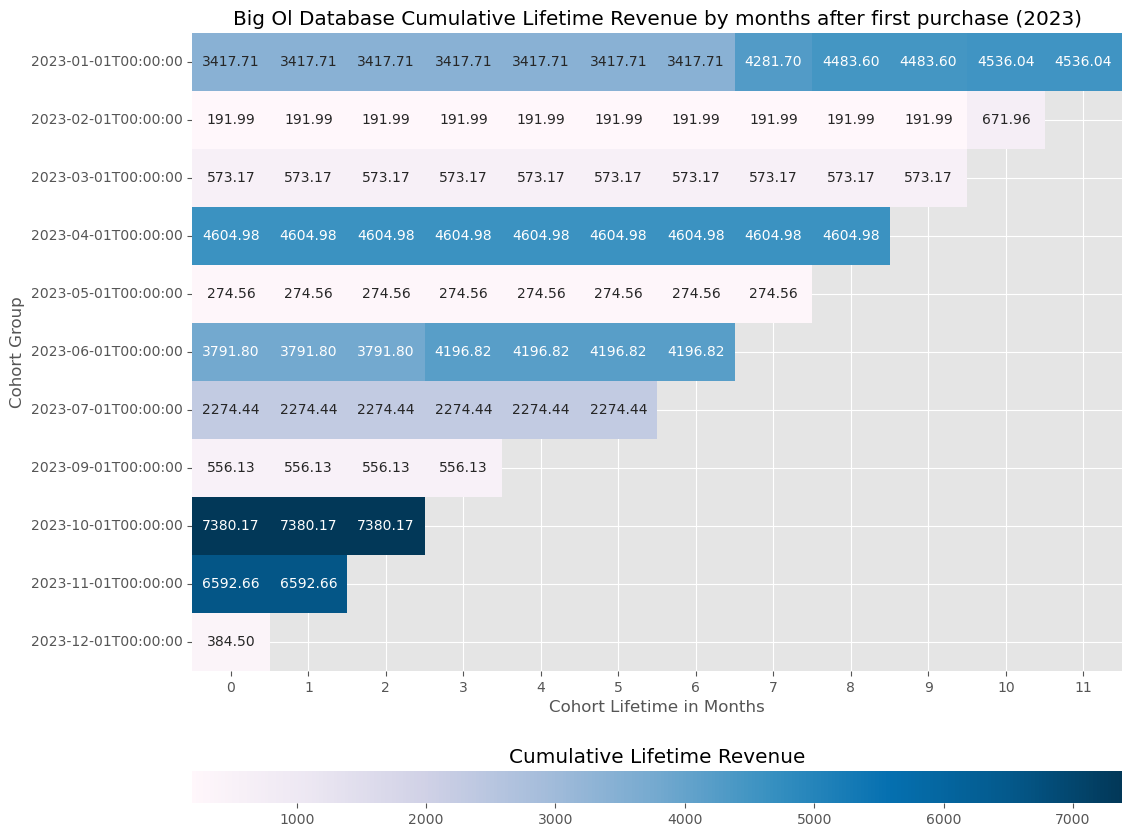

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod5_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Big Ol Database Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

C:\Users\arizk\AppData\Local\Temp\ipykernel_12568\849485520.py:2: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.relplot(data=prod5_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

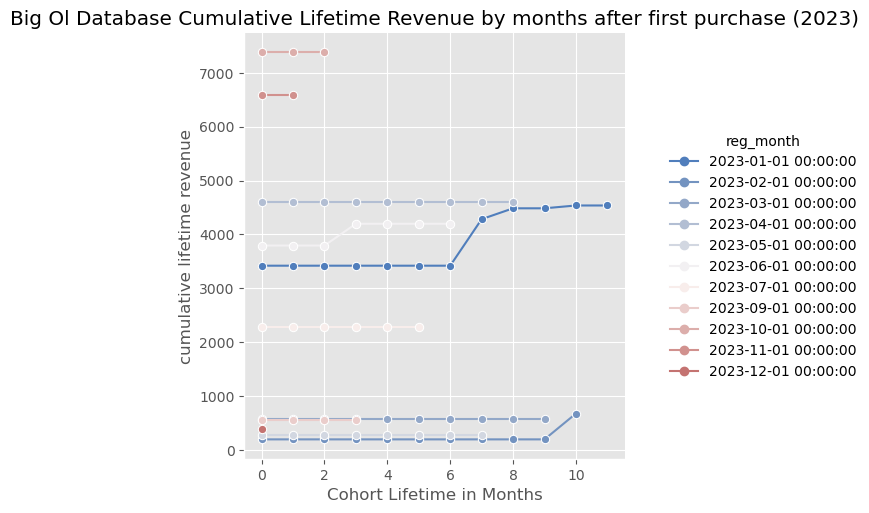

In [ ]:
# some data are easier to read with a different chart- cumulative lifetime revenue lineplots
sns.relplot(data=prod5_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Big Ol Database Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- As there is little to no subsequent purchases for generally all cohorts, its cumulative revenue remains relatively stagnant, its value being determined largely only the initial purchase.

In [20]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod5_2023_user.loc[prod5_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod5_cohort2 = prod5_cohort2.merge(user_max,how='left',on=['reg_month'])
prod5_cohort2 ['customer lifetime revenue'] = (prod5_cohort2['cumulative lifetime revenue'] / prod5_cohort2['user_max'])

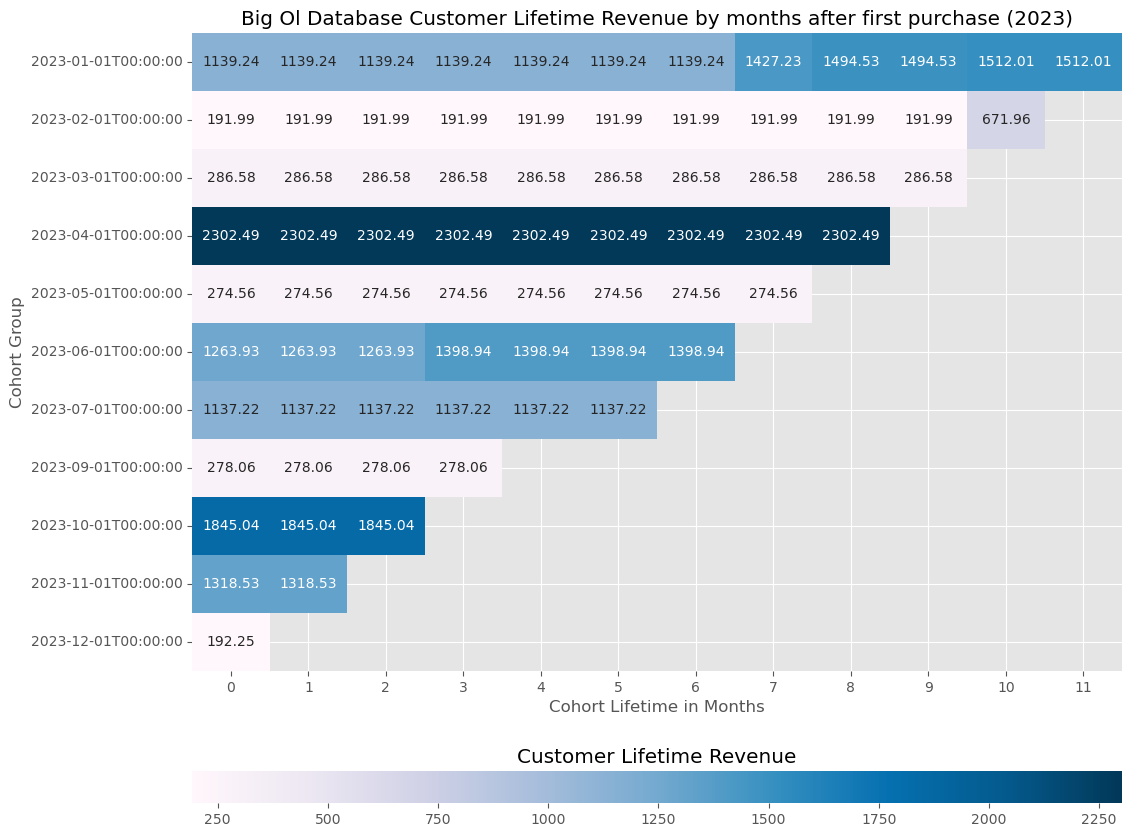

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod5_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Big Ol Database Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

- Generally there is no subsequent purchases across all cohorts, and per-user value throughout the year remains the same as its initial month. In other words, generally each user only bought Big Ol Database once throughout the whole year.
- On a per customer basis, the highest can be observed in the April cohort, as it's initial user value on average is around 2.3k.  

In [21]:
# CLV - but with net profit
prod5_cohort2 ['cum_net_profit'] = prod5_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod5_cohort2 ['Customer Lifetime Value'] = (prod5_cohort2['cum_net_profit'] / prod5_cohort2['user_max'])

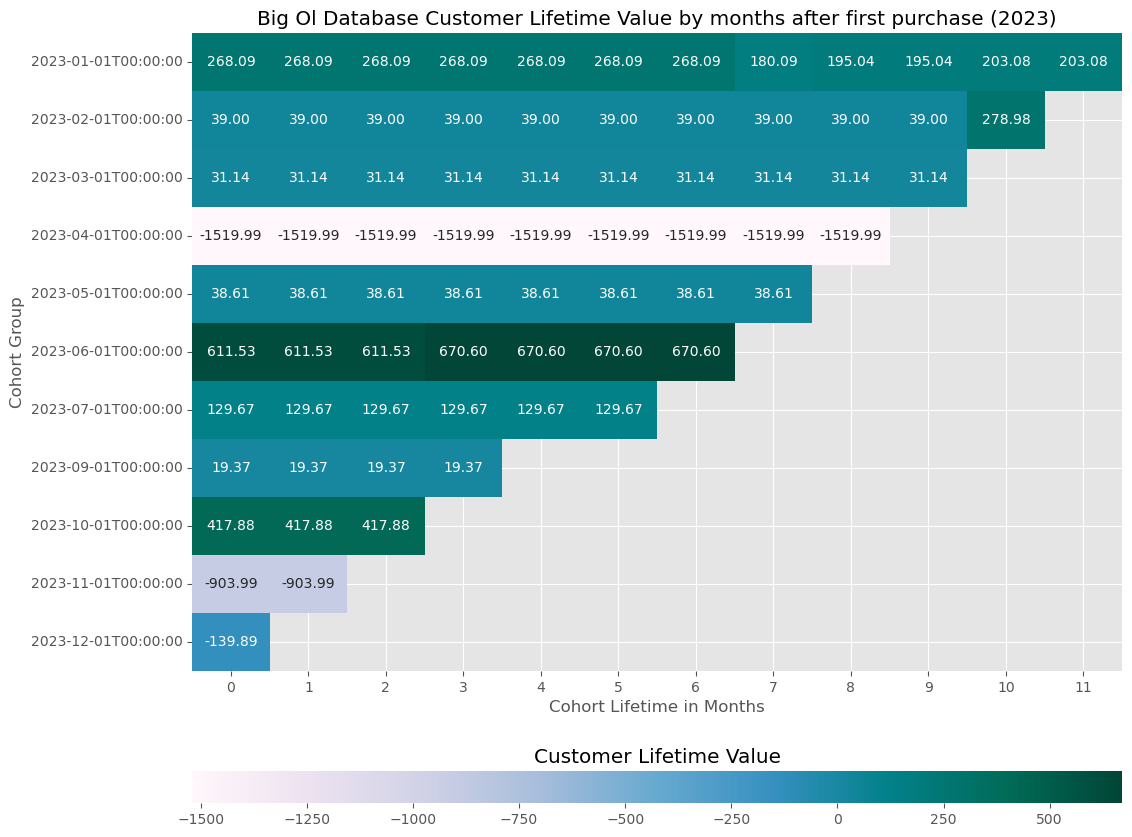

In [30]:
# Customer Lifetime Value, by cohort
pivot6 =prod5_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Big Ol Database Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

C:\Users\arizk\AppData\Local\Temp\ipykernel_6356\1569231899.py:2: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.relplot(data=prod5_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

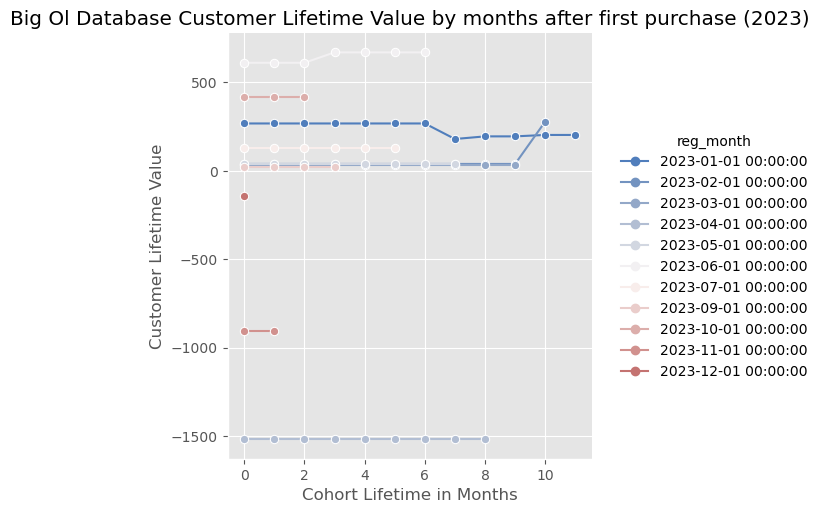

In [23]:
#  customer lifetime value lineplots
sns.relplot(data=prod5_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Big Ol Database Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

-  It can be observed that there are some negative profit values per user in the cohorts, meaning that Big Ol Database is probably contributing to losses.
- December, November, and April cohorts contribute to losses on a per user basis. With April cohort being the highest cause for loss as it contributes -1519.99 in losses per user.
- June cohort provide the highest profits from all the cohorts per user (670.60 made by the third month after the initial purchase, with little to no purchases made from October onwards). Based on the CLV, this cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of June cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1.  In general, there is no user activity for all cohorts beyond the initial purchase. August cohort is missing/have no purchase at all. User retention rates is 0%, NDR is 0%, for all cohorts. Minor exception is the January cohort, which had 3 subsequent purchases starting from September.
2. Highest initial revenue is 7380.17, from the October cohort (4 users).
3. On a per customer basis, the highest revenue is around 2.3k per user, from the April cohort (2 users). Profit-wise, 670.60 is the highest per user, from the June cohort (3 users).
4. Some negative profit values from users. December, November, and April cohorts contribute to losses on a per user basis. With April cohort (the highest revenue per user) marking the highest loss per user, at -1519.99. 

### Profitability

In [23]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod5_2023[prod5_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod5_2023[prod5_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

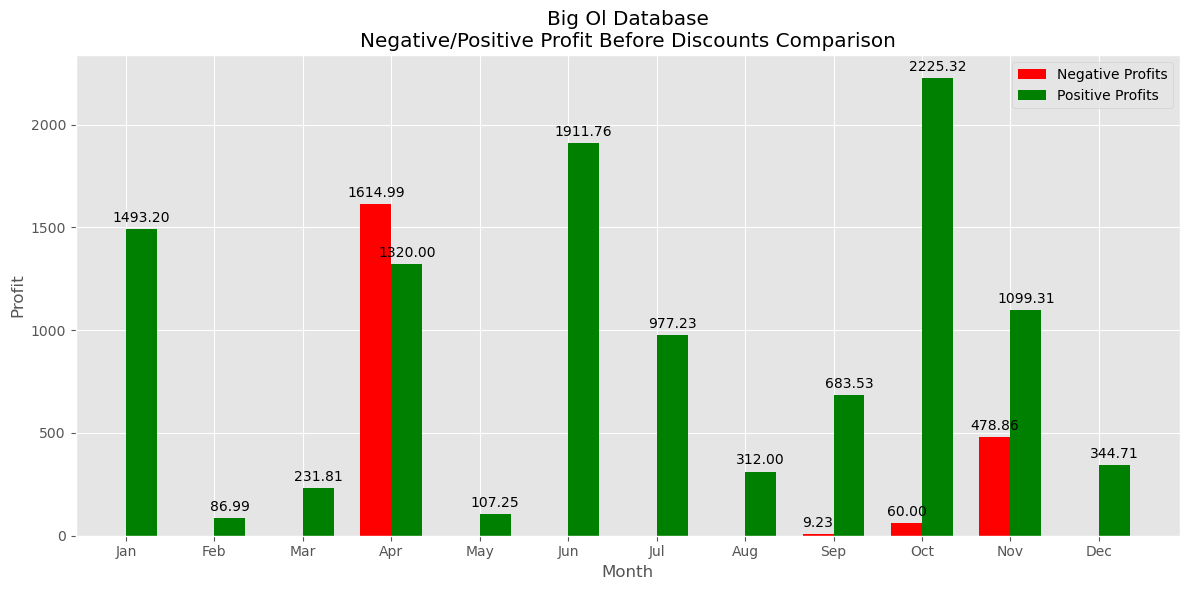

In [27]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Big Ol Database\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

>"Before Discounts" reflects a theoretical scenario assuming sales were made without discounts. This represents a potential profit scenario assuming all sales happened at full price.

In [30]:
prod5_2023[(prod5_2023['month'] == 4)  & (prod5_2023['(net)_profit_before_discount'] < 0)]

,Order ID,Order Date,Date Key,Customer ID,Customer,Segment,Industry,Region,Subregion,Country,City,Product,Sales,Quantity,Discount,net_profit,total_discount_in_dollars,selling_price,(net)_profit_before_discount,net_profit_per_unit_sold,profit_margin,discounted_sales,month,year,year_month,reg_date,Month
3011,EMEA-2023-134845,2023-04-18,20230418,1036,FedEx,Enterprise,Transportation,EMEA,EU-EAST,Russia,Moscow,Big Ol Database,2549.9850,5,0.7000,-3399.9800,1784.9895,509.9970,-1614.9905,-679.9960,-133.3333,764.9955,4,2023,2023-04,2023-04-18,2023-04-01


- It looks like the negative profit in April "before discounts" (-1614.9905) can be attributed to a single significant order by FedEx (Enterprise Segment) that had a large discount (70%). It's a valuable insight into how discounts, especially large ones, can affect overall profitability. Margin of loss was very high, causing an overall net loss even before considering the discounts. Significant discount given to FedEx might have been an attempt to secure a large contract or partnership, but it resulted in a substantial loss due to the high fixed and operational costs associated with running a SaaS database product (assuming "Big Ol Database" is a database product).

**Key findings:**
1. Pre-discounts, Big Ol Database shows generally positive profits in most months. Highest profit month (October) recorded a significant overall profit of 2165.3251 (2225.32 - 60), indicating strong performance during that period. Other noticable peaks are January (1493.2018) and June (1911.7561).
2. April stands out as an outlier with a negative profit of -294.9949 (1320 - 1614.99), the only month with a negative total. April is confirmed to have a significant net loss due to the large discount applied to a FedEx order (70% discounts). Margin of loss was very high, causing an overall net loss even before considering the discounts. 

### Discounting EDA

In [38]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod5_2023[(prod5_2023['net_profit'] < 0)]
post_discount_positives = prod5_2023[(prod5_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

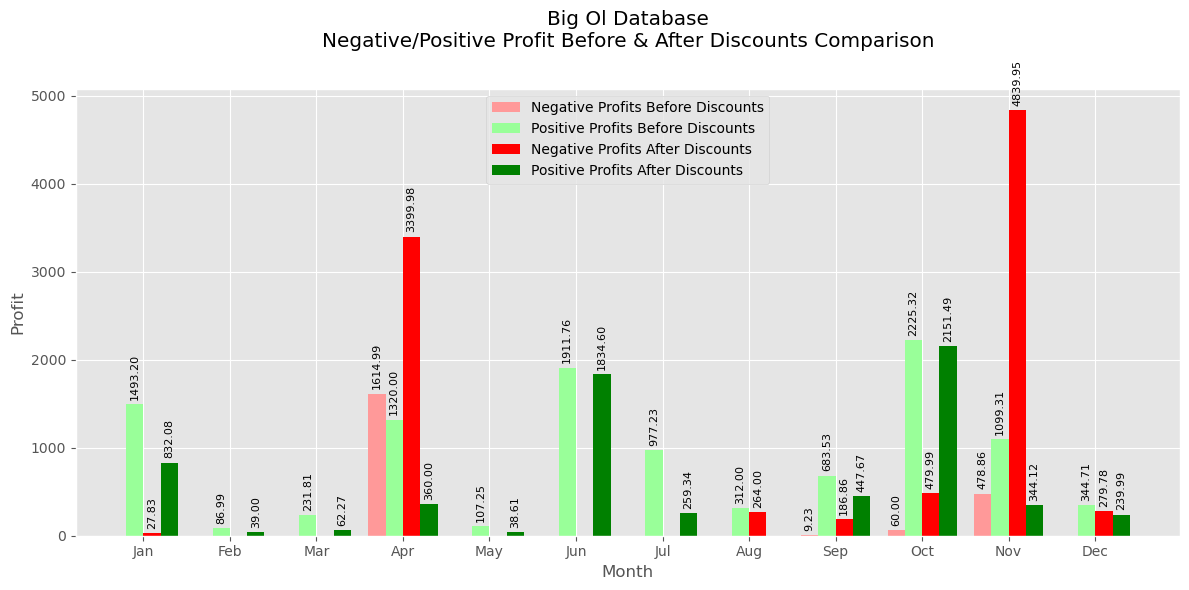

In [41]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Big Ol Database\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

>"After Discounts" reflect actual profit accounting for discounts, showing real-world profit outcomes.

- After discounts, severe negative impacts due to discounts can be seen, turning what could have been neutral or positive outcomes into substantial losses.
- Months like April (-3039.98 = 360 - 3399.9800) and November (-4495.83 = 344.1189 - 4839.95) are extreme cases where discounts turned otherwise potential positive profit into losses (November being the highest loss). Other months include December, which after discounts had a shift from positive profit to a slight negative (-39.7950), and August, which moved from a positive profit to -264 (-576 reduction in profit).
- Some months managed to maintain positive profits, even after discounts, such as June (1834.5961) and October (1671.5036).
- Big Ol Database shows the potential for strong profitability (based on "before discounts" scenario) but is heavily impacted by discounting strategies. For better resilience, the discounting approach might need re-evaluation to maintain positive net profits.

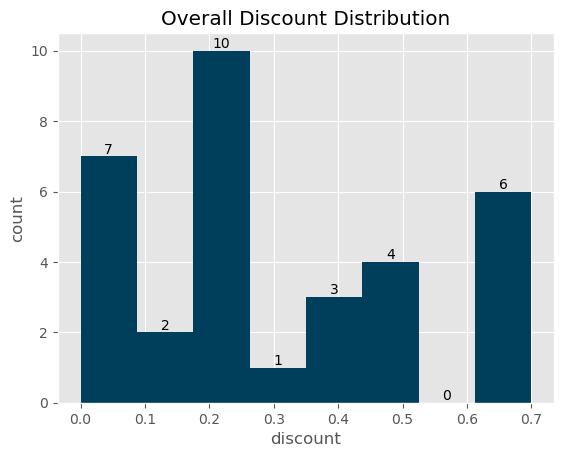

In [60]:
n, bins, patches = plt.hist(data=prod5_2023, x='Discount', bins=8, color='#003f5c')
plt.title('Overall Discount Distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()


In [54]:
# total orders
7+2+10+1+3+4+6

33

In [55]:
# discounted orders
2+10+1+3+4+6

26

In [56]:
# lower discounts (10-20%)
2 + 10

12

In [ ]:
# middle discounts (30-40%)
1+3 

4

In [58]:
#higher discounts (50-70%)
4+6

10

- A substantial proportion of Big Ol Database's total orders (26 out of 33, approximately 79%) are achieved through discounting. Notably, there are significant order counts in both the lower (10-20%) and higher (50-70%) discount ranges, with 12 and 10 orders respectively.
- Considering the discount range spans from 10% to 70%, this indicates that Big Ol Database heavily relies on extensive discounting to drive sales. This reliance on large discount ranges suggests that the product struggles to generate demand at its full price, which is a negative indicator of strong demand and perceived value.

In [61]:
# Range of Discounts (January, April, June, October, November)
filtered_df = prod5_2023[prod5_2023['month'].isin([1, 4, 6, 10, 11])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std       mean        min     median        75%  \
month Discount                                                         
1     0.1000    373.2871   416.0421   152.0883   416.0421   548.0191   
      0.5000         NaN   -27.8280   -27.8280   -27.8280   -27.8280   
4     0.2000         NaN   359.9988   359.9988   359.9988   359.9988   
      0.7000         NaN -3399.9800 -3399.9800 -3399.9800 -3399.9800   
6     0.0000   1154.0134   852.1943    36.1836   852.1943  1260.1997   
      0.2000         NaN   130.2075   130.2075   130.2075   130.2075   
10    0.0000    413.5083  1059.5951   767.2005  1059.5951  1205.7923   
      0.2000         NaN    32.3015    32.3015    32.3015    32.3015   
      0.7000         NaN  -479.9880  -479.9880  -479.9880  -479.9880   
11    0.0000         NaN    24.1224    24.1224    24.1224    24.1224   
      0.2000     79.1946   159.9982   103.9992   159.9982   187.9978   
      0.5000         NaN -3839.9904 -3839.9904 -3839.9904 -3839.9904   
      0.7000    616.5713  -499.9778  -935.9595  -499.9778  -281.9869   

                      max  count  
month Discount                    
1     0.1000     679.9960      2  
      0.5000     -27.8280      1  
4     0.2000     359.9988      1  
      0.7000   -3399.9800      1  
6     0.0000    1668.2050      2  
      0.2000     130.2075      1  
10    0.0000    1351.9896      2  
      0.2000      32.3015      1  
      0.7000    -479.9880      1  
11    0.0000      24.1224      1  
      0.2000     215.9973      2  
      0.5000   -3839.9904      1  
      0.7000     -63.9960      2

Data above is the distribution of profit across different discount ranges, for 5 representative months. Reasons choosing particular months are as follows: 
- January: High positive profit with moderate discount impact.
- April: Significant negative profit due to heavy discount.
- June: High positive profit with minimal discount impact.
- October: High profit both before and after discount, with significant discount impact.
- November: Severe negative impact from discounts.

- Orders within the 70% discount range (as can be seen in April, October, and November) consistently resulted in significant losses. Same can be said of orders within the 50% discount range (which can be seen in January and November). This suggests that while these discounts might be attractive to customers, they are detrimental to the profitability of Big Ol Database. Consistent losses across these high discount ranges indicate a need for a strategic review of discount policies to balance customer attraction with profitability.
- Though the variability assessment is limited due to a lack of orders, profits from the 0-20% discount orders are generally positive across all months. No discounts (June, October, and November all have positive mean profits), 10% discount (January shows positive mean profits), and 20% discount (April, June, October, and November all have positive mean profits). This indicate that these lower discounts are effective in maintaining profitability for Big Ol Database. However, the limited number of orders suggests sales might be constrained. Enhancing the perceived value of the product could encourage more purchases with lower discounts.

**Key findings:**
1. 79% of total orders (26 out of 33) are achieved through discounting, with significant counts in lower (10-20%) and higher (50-70%) discount ranges. 
2. Severe negative impacts on profits due to discounts, turning potential positive outcomes into substantial losses. April (-3039.98) and November (-4495.83) experienced extreme losses from discounts, turning potential positive profits into significant losses.
3. Some months like June (1834.5961) and October (1671.5036) managed to maintain positive profits even after discounts.
4. Reliance on discounts ranging from 10% to 70%, indicate struggles to generate demand at full price. 
5. 0-20% discount orders generally result in positive profits, though the limited number of orders suggests constrained sales. Enhancing product value could encourage purchases with lower discounts.

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod5_2023_segment = prod5_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod5_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod5_2023_percents = segment_account.merge(prod5_2023_segment,how='left',on=['Segment'])
prod5_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,10,45,11947.6690,8962.3129,2019.0617,-966.2944
1,SMB,8,31,3777.6770,2856.5581,1186.5746,265.4557
2,Strategic,14,45,27819.3290,20226.5641,5424.3880,-2168.3769


In [8]:
# calculate percentage of segment's business share by category
prod5_2023_percents['% Account']= prod5_2023_percents['account'] / prod5_2023_percents['account'].sum() *100
prod5_2023_percents['% Quantity']= prod5_2023_percents['Quantity'] / prod5_2023_percents['Quantity'].sum() *100
prod5_2023_percents['% Sales']= prod5_2023_percents['Sales'] / prod5_2023_percents['Sales'].sum() *100
prod5_2023_percents['% Net Revenue']= prod5_2023_percents['discounted_sales'] / prod5_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod5_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod5_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

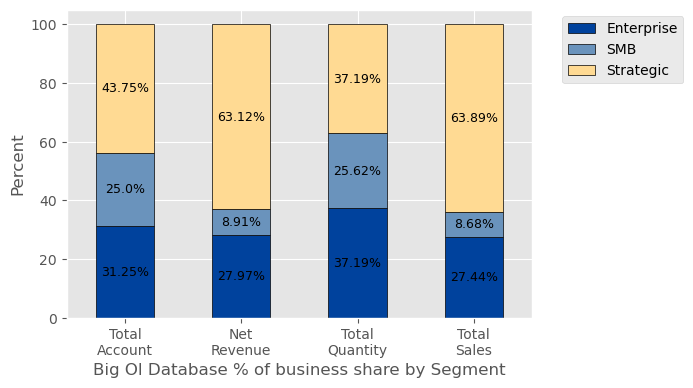

In [35]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod5_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Big Ol Database % of business share by Segment')
plt.ylabel('Percent')

 - In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "Big Ol Database" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for Big Ol Database based on the last year of company activity.
 - Strategic Segment holds the largest share of Total Accounts (43.75%) and dominates in Net Revenue (63.12%) and Total Sales (63.89%).

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

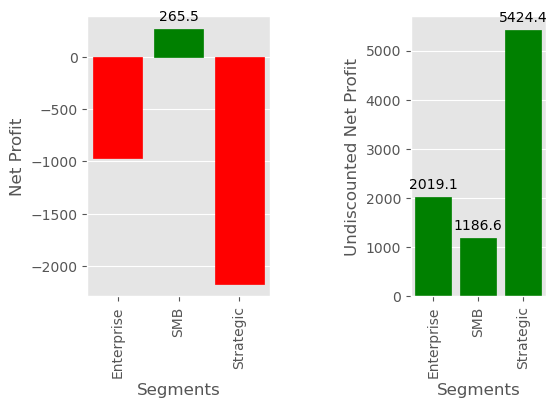

In [36]:
# Big Ol Database net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod5_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod5_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Despite its negative Net Profit (-2,168.38), the Strategic Segment has a high Undiscounted Net Profit (5424.4), indicating potential financial value.
- SMB segment has the lowest percentages across all categories but is financially stable with a positive Net Profit (265.5) and Undiscounted Net Profit (1186.6).
- Enterprise segment also has substantial shares, especially in Total Quantity (37.19%) and Total Accounts (31.25%). It shows a significant negative Net Profit (-1500) but a positive Undiscounted Net Profit (2019.1).

To maximize overall business performance, priority should be on the Strategic segment, despite its negative net profit of -2,168.38. This segment contributes 63.12% to Net Revenue and 63.89% to Sales. Improvement for profitability should be on optimizing cost management and pricing strategies. Second priority is to enhance the Enterprise segment, which has a significant contribution in quantity of unit purchases (37.19%) and a Net Profit before discount of 2,019, showing potental. However, it currently holds a Net Profit of -966.29. Lastly, continue supporting the SMB segment, which, though smaller in contribution (8.91% to Net Revenue and 8.68% to Sales), exhibits efficiency with a positive Net Profit of 265.46, ensuring steady growth without significant cost increases.

### Further Inquiries on Segments -----------

In [11]:
# Copy-pasted code for Industry queries within segment
# Industries using Big Ol Database within the SMB Segment
prod5_2023_industry_SMB = prod5_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod5_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod5_2023_percents_SMB = SMB_account.merge(prod5_2023_industry_SMB,how='left',on=['Industry'])
prod5_2023_percents_SMB['% Account']= prod5_2023_percents_SMB['account'] / prod5_2023_percents_SMB['account'].sum() *100
prod5_2023_percents_SMB['% Quantity']= prod5_2023_percents_SMB['Quantity'] / prod5_2023_percents_SMB['Quantity'].sum() *100
prod5_2023_percents_SMB['% Sales']= prod5_2023_percents_SMB['Sales'] / prod5_2023_percents_SMB['Sales'].sum() *100
prod5_2023_percents_SMB['% Net Revenue']= prod5_2023_percents_SMB['discounted_sales'] / prod5_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod5_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod5_SMB = percents_SMB.columns.tolist()
# Industries using Big Ol Database within the Strategic Segment
prod5_2023_industry_Strategic = prod5_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod5_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod5_2023_percents_Strategic = Strategic_account.merge(prod5_2023_industry_Strategic,how='left',on=['Industry'])
prod5_2023_percents_Strategic['% Account']= prod5_2023_percents_Strategic['account'] / prod5_2023_percents_Strategic['account'].sum() *100
prod5_2023_percents_Strategic['% Quantity']= prod5_2023_percents_Strategic['Quantity'] / prod5_2023_percents_Strategic['Quantity'].sum() *100
prod5_2023_percents_Strategic['% Sales']= prod5_2023_percents_Strategic['Sales'] / prod5_2023_percents_Strategic['Sales'].sum() *100
prod5_2023_percents_Strategic['% Net Revenue']= prod5_2023_percents_Strategic['discounted_sales'] / prod5_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod5_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod5_Strategic = percents_Strategic.columns.tolist()
# Industries using Big Ol Database within the Enterprise Segment
prod5_2023_industry_Enterprise = prod5_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod5_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod5_2023_percents_Enterprise = Enterprise_account.merge(prod5_2023_industry_Enterprise,how='left',on=['Industry'])
prod5_2023_percents_Enterprise['% Account']= prod5_2023_percents_Enterprise['account'] / prod5_2023_percents_Enterprise['account'].sum() *100
prod5_2023_percents_Enterprise['% Quantity']= prod5_2023_percents_Enterprise['Quantity'] / prod5_2023_percents_Enterprise['Quantity'].sum() *100
prod5_2023_percents_Enterprise['% Sales']= prod5_2023_percents_Enterprise['Sales'] / prod5_2023_percents_Enterprise['Sales'].sum() *100
prod5_2023_percents_Enterprise['% Net Revenue']= prod5_2023_percents_Enterprise['discounted_sales'] / prod5_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod5_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod5_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

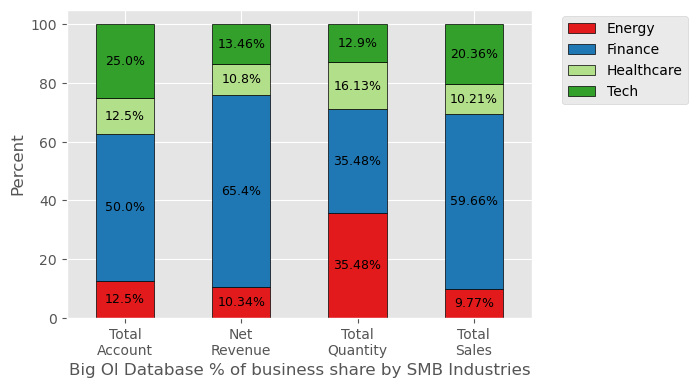

In [38]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod5_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Big Ol Database % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry dominates across most categories, with a substantial share in Total Accounts (50.0%), Net Revenue (65.4%), and Total Sales (59.66%).
- Energy and Finance industries share the highest percentage in Total Quantity (35.48% each).
- Tech has a moderate share in all categories, with the highest in Total Accounts (25.0%) and Total Sales (20.36%).
- Healthcare has the lowest contributions overall, with relatively low percentages across all categories.

([0, 1, 2, 3],
 [Text(0, 0, 'Energy'),
  Text(1, 0, 'Finance'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Tech')])

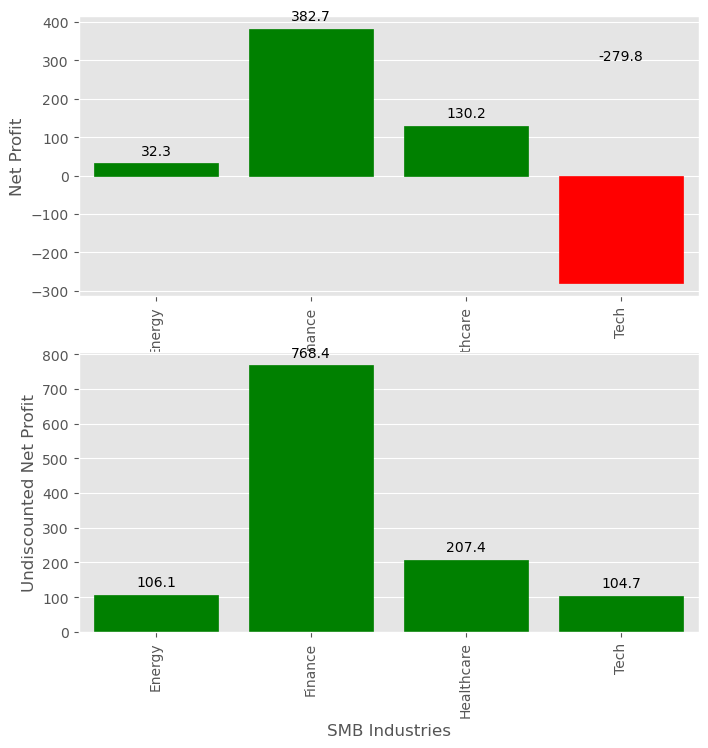

In [39]:
# Big Ol Database net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod5_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod5_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry shows the highest Net Profit (382.7) and Undiscounted Net Profit (768.4).
- Healthcare also has positive figures, with a Net Profit of 130.2 and an Undiscounted Net Profit of 207.4.
- Energy contributes positively with a Net Profit of 32.3 and an Undiscounted Net Profit of 106.1.
- Tech industry faces challenges with a negative Net Profit (-279.8), despite having an Undiscounted Net Profit of 104.7.

Finance industry stands out with 50.0% of Total Accounts, 65.4% of Net Revenue, and 59.66% of Total Sales, supported by a Net Profit of 382.7 and an Undiscounted Net Profit of 768.4. Meanwhile, the Healthcare industry, contributing 12.5% of Total Accounts, 10.8% of Net Revenue, and 10.21% of Total Sales, shows potential with a Net Profit of 130.2 and an Undiscounted Net Profit of 207.4, indicating growth prospects within the SMB segment.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

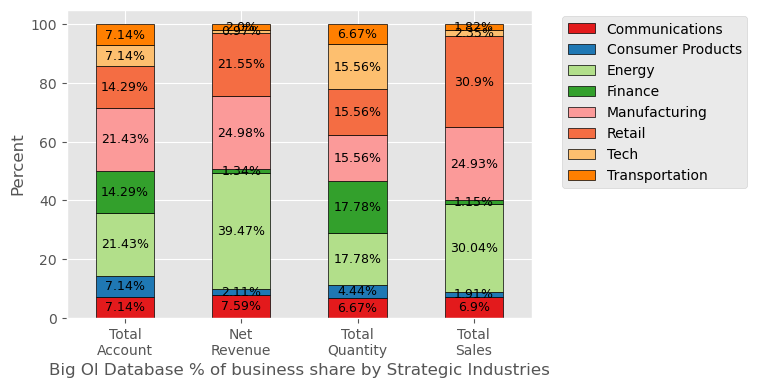

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod5_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Big Ol Database % of business share by Strategic Industries')
plt.ylabel('Percent')

- Energy, Manufacturing, and Retail industries hold the highest shares in Net Revenue and Total Sales.
- Finance has a significant share in Total Accounts and Total Quantity but lower contributions in Net Revenue and Total Sales.
- Tech and Consumer Products have relatively low contributions across all categories.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Retail'),
  Text(6, 0, 'Tech'),
  Text(7, 0, 'Transportation')])

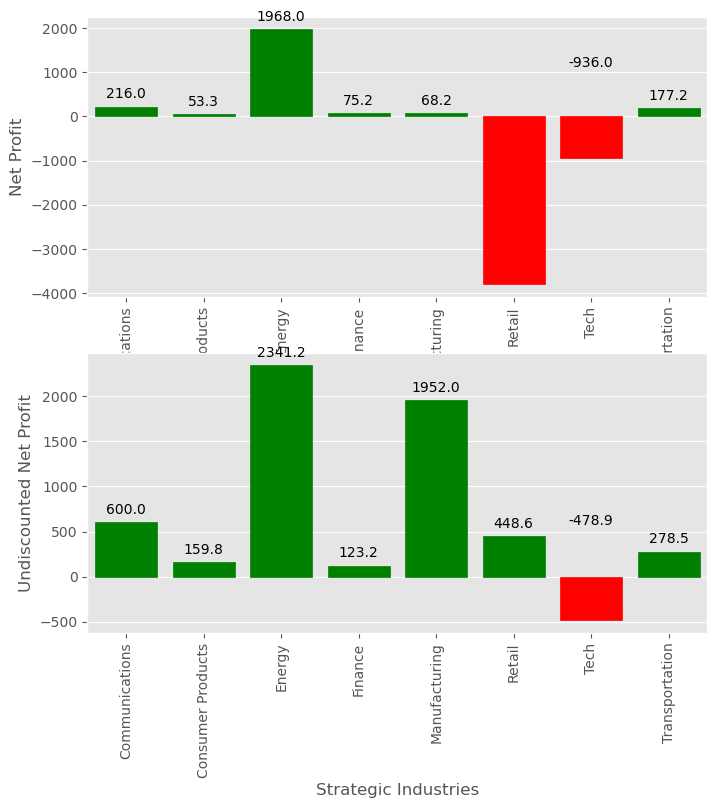

In [41]:
# Big Ol Database net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod5_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod5_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Energy has the highest Net Profit (1968.0) and Undiscounted Net Profit (2341.2)
- Manufacturing shows weak positive financial performance with a Net Profit of 68.2 but huge potential, with Undiscounted Net Profit of 1952.
- Retail has the most significant negative Net Profit (-3000.0) but has a positive Undiscounted Net Profit (448.6), indicating potential value.
- Tech also shows a significant negative Net Profit (-936.0), suggesting financial challenges.

Energy and Manufacturing industries are top performers in financial contributions. Energy has a Net Profit of 1968.0 and an Undiscounted Net Profit of 2341.2, making up 39.47% of Net Revenue and 30.04% of Total Sales, highlighting its dominance. Manufacturing, with a modest Net Profit of 68.2 but an Undiscounted Net Profit of 1952.0, contributes 24.98% to Net Revenue and 24.93% to Total Sales, showing strong market potential. Despite Retail's negative Net Profit of -3000.0, its positive Undiscounted Net Profit of 448.6 indicates future value, emphasizing the crucial roles of Energy and Manufacturing in the Strategic segment, while acknowledging Retail's latent potential.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

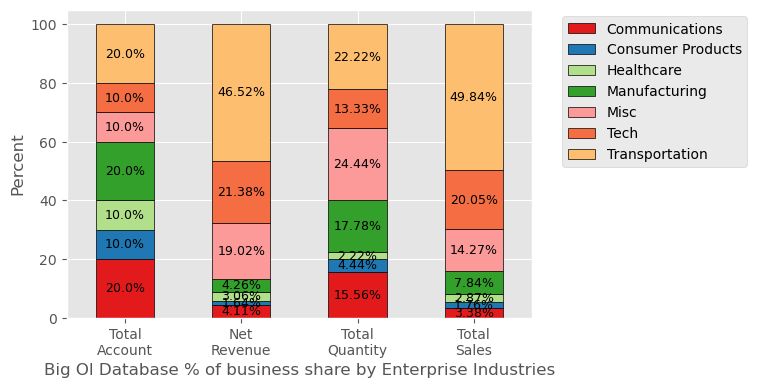

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod5_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Big Ol Database % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Transportation industry dominates in Net Revenue (46.52%) and Total Sales (49.84%).
- Tech industry has significant contributions in Net Revenue (21.38%), Total Quantity (24.44%), and Total Sales (20.05%).
- Misc also shows strong shares in Net Revenue (19.02%) and Total Sales (14.27%).
- Manufacturing contributes notably to Total Quantity (17.78%), despite lower shares in other categories.
- Communications, Consumer Products, and Healthcare have lower percentages across most categories.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Manufacturing'),
  Text(4, 0, 'Misc'),
  Text(5, 0, 'Tech'),
  Text(6, 0, 'Transportation')])

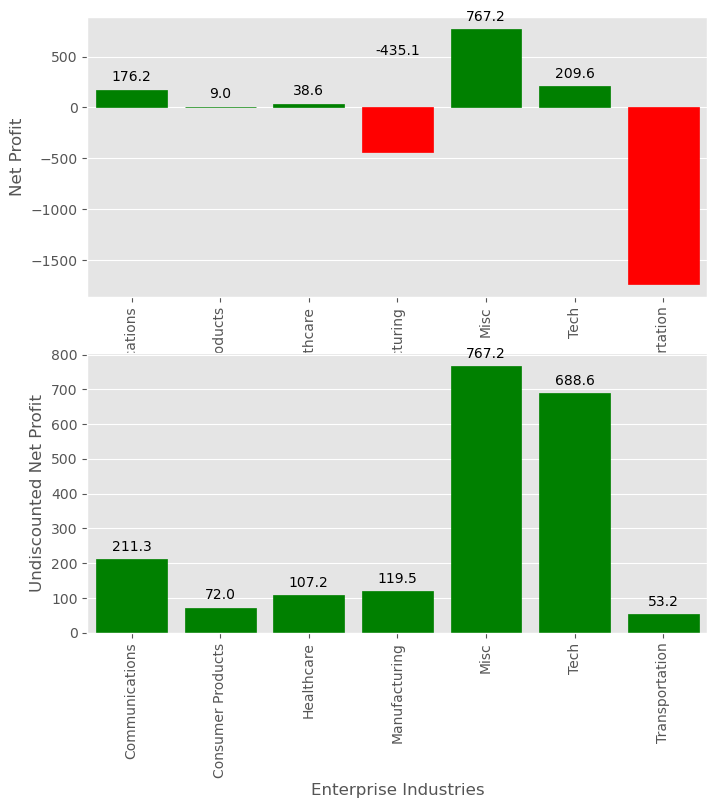

In [43]:
# Big Ol Database net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod5_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod5_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Miscellaneous has the highest Net Profit (767.2) and matches its Undiscounted Net Profit (767.2), indicating consistent financial performance.
- Tech also shows strong performance with a Net Profit of 209.6 and an Undiscounted Net Profit of 688.6.
- Communications contributes positively with a Net Profit of 176.2 and an Undiscounted Net Profit of 211.3.
- Transportation and Manufacturing industries face financial challenges, with negative Net Profits of ~-1500 and -435.1, respectively, though they have positive Undiscounted Net Profits of 53.2 and 119.5.

Tech and Miscellaneous industries are top performers, with Tech holding 21.38% of Net Revenue, 20.05% of Total Sales, a Net Profit of 209.6, and an Undiscounted Net Profit of 688.6. Miscellaneous contributes 19.02% of Net Revenue, 14.27% of Total Sales, and a Net Profit of 767.2. In contrast, Transportation and Manufacturing lead in Net Revenue (46.52%) and Total Sales (49.84%), with significant Quantity (17.78%), but face financial challenges with Net Profits of -1500 and -435.1. Their Undiscounted Net Profits of 53.2 and 119.5 suggest potential for improvement with better cost management.

**Key findings:**
1. To maximize overall business performance, prioritize the Strategic segment (63.12% Net Revenue, 63.89% Sales, -2,168.38 Net Profit) by optimizing cost management and pricing; enhance the Enterprise segment (37.19% Quantity, 2,019 Net Profit before discount, -966.29 Net Profit) for profitability; and continue supporting the efficient SMB segment (8.91% Net Revenue, 8.68% Sales, 265.46 Net Profit) for steady growth. 

### Regional EDA

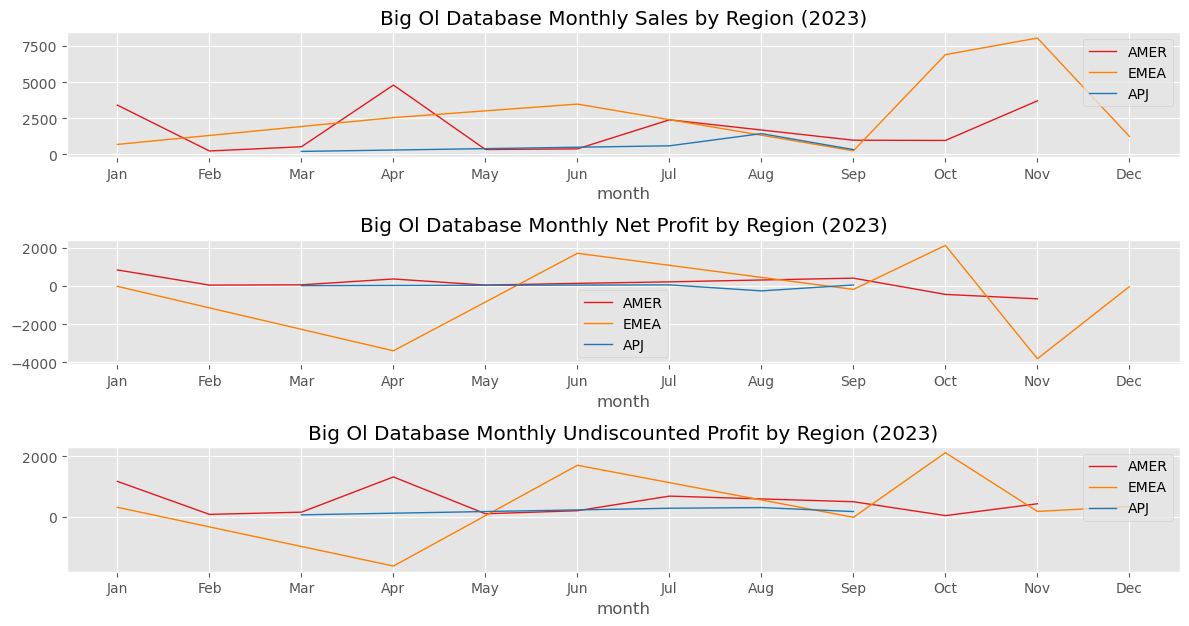

In [7]:
# Big Ol Database Monthly Income EDA by Region (2023)
prod5_region_month = prod5_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod5_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod5_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod5_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Big Ol Database Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod5_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod5_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod5_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Big Ol Database Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod5_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod5_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod5_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Big Ol Database Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

All regions have strong sales periods but suffer profit declines due to heavy discounting. They also experience inactivity in certain months from low product demand. Market competition, seasonal fluctuations, and economic conditions further impact performance.
- In the AMER region January, April, July, and November demonstrate strong sales performance. However, profits from September through November decline significantly, turning negative, which suggests that heavier discounting in these months sacrifices profit to boost sales. Notably, August and December have no sales activity.
- In the EMEA region, sales peak in June, October, and November, but profits in April, September, and November (especially) dive into negative territory, likely due to heavy discounting. Months such as February, March, May, July, and August show no sales, indicating mid-year inactivity.
- In the APJ region, August stands out with high sales, yet this month also experiences a profit decline into negative numbers, hinting at possible heavy discounting. The majority of the year, including January, February, April, May, June, October, November, and December, shows no sales activity, suggesting prolonged periods of inactivity.

Performance Highlights
- Highest Sales: In EMEA, November shows the highest sales of 8,052.42. Yet, this is also the lowest month in net profit, at -3815.8680
- Highest Net Profit: The highest net profit is seen in EMEA, October, with a net profit of 2,119.19.
- Highest Undiscounted Profit: EMEA in October also shows the highest undiscounted profit at 2,119.19.

In [10]:
prod5_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,5,3410.9550,3069.8595,1173.1798,832.0843
1,AMER,2,2,239.9840,191.9872,86.9942,38.9974
2,AMER,3,2,532.7200,426.1760,159.8160,53.2720
3,AMER,4,2,4799.9840,3839.9872,1319.9956,359.9988
4,AMER,5,1,343.2000,274.5600,107.2500,38.6100
5,AMER,6,5,385.8000,308.6400,207.3675,130.2075
6,AMER,7,6,2395.2000,1916.1600,688.6200,209.5800
7,AMER,9,7,986.2800,885.0240,504.0540,402.7980
8,AMER,10,16,969.1450,475.3235,46.1350,-447.6865
9,AMER,11,13,3708.9570,2592.6711,436.3269,-679.9590


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

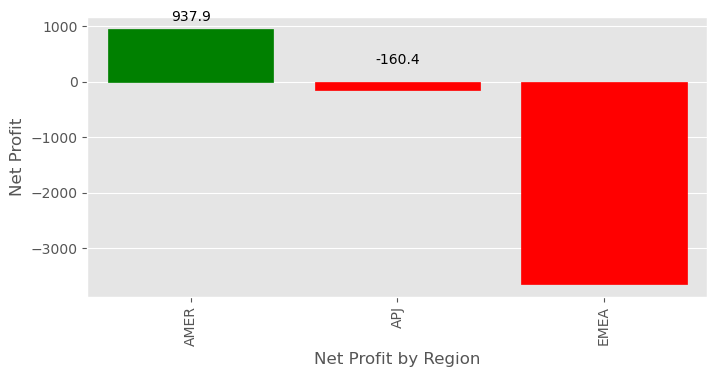

In [11]:
prod5_region = prod5_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod5_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [12]:
prod5_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,59,17772.2250,13980.3885,4729.7390,937.9025
1,APJ,11,2583.6100,1571.1646,852.0771,-160.3683
2,EMEA,51,23188.8400,16493.8820,3048.2082,-3646.7498


Mixed Performance
- AMER region has strong sales in January, April, July, and November, totaling $17,772.23, but faces profit declines in October (-$447.69) and November (-$679.96) due to heavy discounting or high costs. Despite maintaining a yearly net profit of $937.90, it has no sales activity in August and December, indicating periods of inactivity that need strategic focus. Among the other other regions it is the only region to have a positive net profit (937.9).

Challenging Region
- Although the EMEA region leads in total sales with $23,188.84 and discounted sales of $16,493.88 from 51 units sold, it suffers a substantial net loss of -$3,646.75. Negative net profit is significant in both April and November. In April, the net profit declines by -$3,399.98 despite sales of $2,549.99. Similarly, in November, the net loss totals -$3,815.87, despite high sales of $8,052.42. Heavy discounting or high costs severely impacted overall profitability.
- With only 11 units sold and a net loss of -$160.37, it's clear that the APJ region struggles with low demand. This is further underscored by the fact that most months in this region show no sales activity, reflecting a significant challenge in generating consistent interest and maintaining profitability.

In [13]:
grouped = prod5_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [14]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

In [15]:
pd.set_option('display.max_rows', None)
metrics_sorted

,Region,Segment,Industry,total_sales,avg_sales_per_order,total_profit,total_profit before discounts,avg_discount,profit_margin
0,AMER,Enterprise,Communications,350.9730,350.9730,152.0883,187.1856,0.1000,43.3333
1,AMER,Enterprise,Healthcare,343.2000,343.2000,38.6100,107.2500,0.2000,11.2500
2,AMER,Enterprise,Manufacturing,599.9850,599.9850,-479.9880,-59.9985,0.7000,-80.0000
3,AMER,Enterprise,Tech,2395.2000,2395.2000,209.5800,688.6200,0.2000,8.7500
4,AMER,SMB,Energy,369.1600,369.1600,32.3015,106.1335,0.2000,8.7500
5,AMER,SMB,Finance,1519.9920,759.9960,329.5992,537.5976,0.1000,21.6843
6,AMER,SMB,Healthcare,385.8000,385.8000,130.2075,207.3675,0.2000,33.7500
7,AMER,Strategic,Communications,1919.9760,1919.9760,215.9973,599.9925,0.2000,11.2500
8,AMER,Strategic,Consumer Products,532.7200,532.7200,53.2720,159.8160,0.2000,10.0000
9,AMER,Strategic,Energy,3155.9760,1577.9880,616.0000,989.1940,0.4000,19.5185


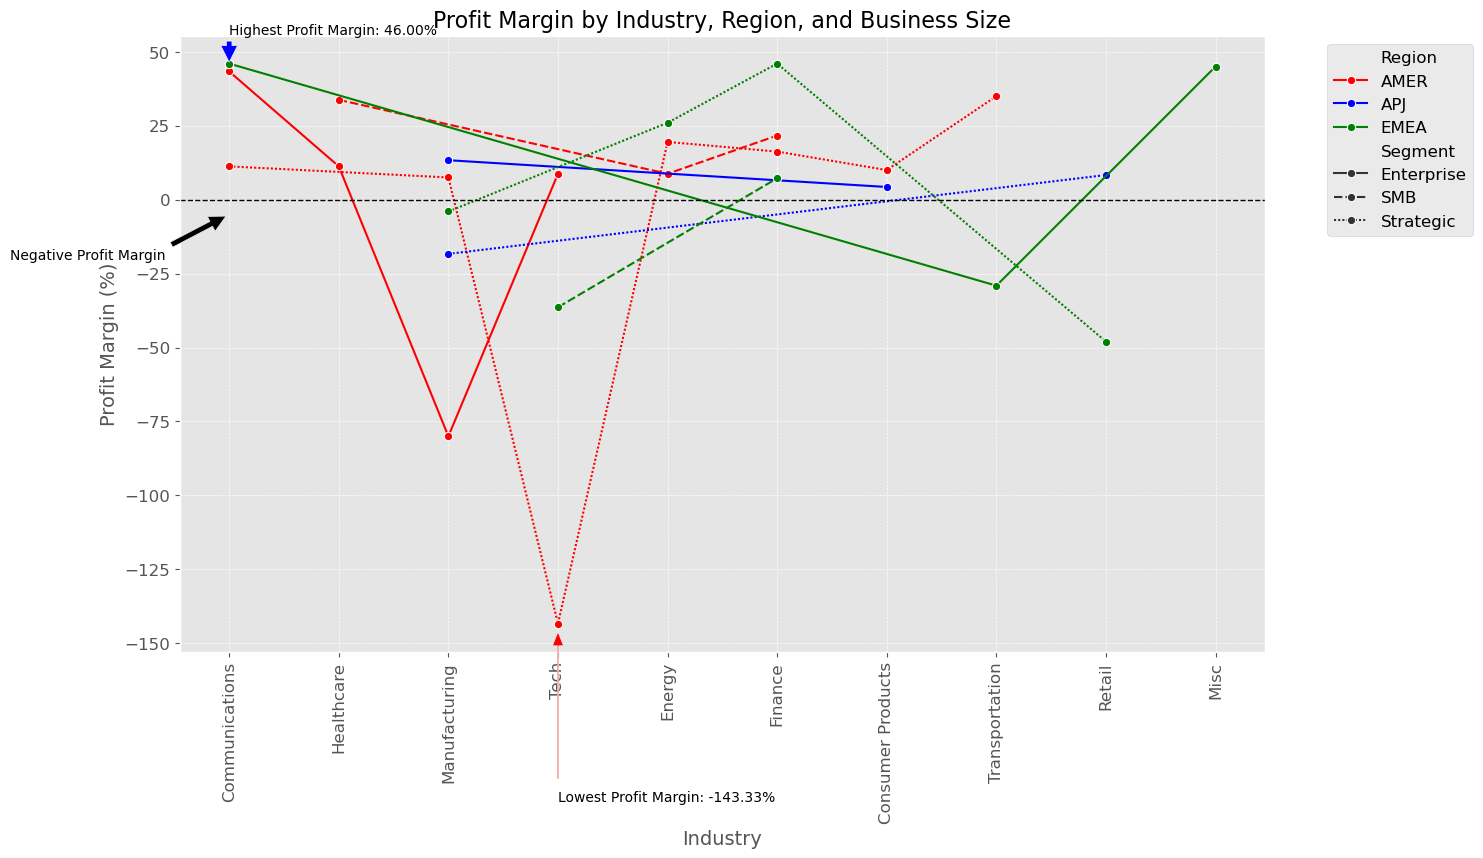

In [16]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Annotate the plot with an arrow pointing outside the chart
plt.annotate(
    'Negative Profit Margin', 
    xy=(0, -5),  # Point of the arrow
    xytext=(-2, -20),  # Position of the text
    arrowprops=dict(facecolor='black', shrink=0.05)
)

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit - 60),  # Move text position to point arrow downwards
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8, headlength=10)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [20]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])

In [25]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)


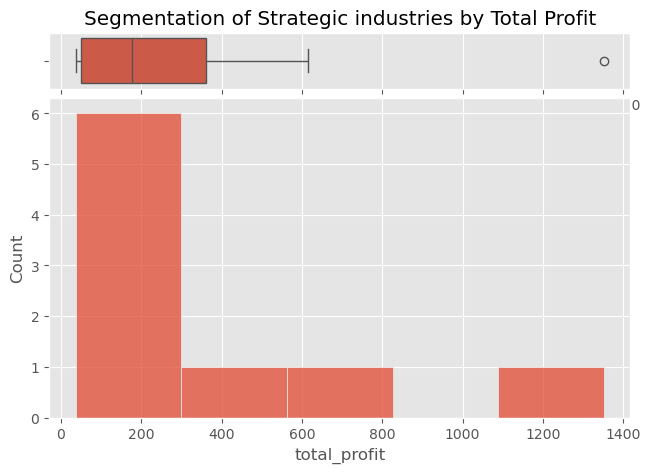

0.0000     36.1836
0.2500     49.7610
0.5000    177.1980
0.7500    359.9988
1.0000   1351.9896
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 360.00 in profit
- 3 (Good) : Contributes between 177.20 and 360.00 in profit
- 2 (Marginal) : Contributes between 49.76 and 177.20 in profit
- 1 (Underperforming) : Contributes less than 49.76 in profit


In [26]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [27]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
23,EMEA,Strategic,Energy,1351.9896,0.0000,4
9,AMER,Strategic,Energy,616.0000,0.4000,4
11,AMER,Strategic,Manufacturing,359.9988,0.2000,3
7,AMER,Strategic,Communications,215.9973,0.2000,3
13,AMER,Strategic,Transportation,177.1980,0.2000,2
8,AMER,Strategic,Consumer Products,53.2720,0.2000,2
17,APJ,Strategic,Retail,49.7610,0.4000,1
10,AMER,Strategic,Finance,38.9974,0.2000,1
24,EMEA,Strategic,Finance,36.1836,0.0000,1


In [28]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1,2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Energy in EMEA, Energy in AMER are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Manufacturing in AMER, Communications in AMER all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Transportation in AMER, Consumer Products in AMER, Retail in APJ, Finance in AMER, Finance in EMEA are underperforming.
These Strategic industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [24]:
###Filter negative profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the negative profits from the Strategic segment
strategic_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_negative_profit_metrics = strategic_negative_profit_metrics.sort_values(by='total_profit', ascending=False)
strategic_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount
25,EMEA,Strategic,Manufacturing,-27.8280,0.5000
16,APJ,Strategic,Manufacturing,-263.9967,0.4000
12,AMER,Strategic,Tech,-935.9595,0.7000
26,EMEA,Strategic,Retail,-3839.9904,0.5000


- The Strategic segment suffers mainly from losses in the Retail and Tech sectors. From previous analysis, Retail, which holds a significant share in Net Revenue (21.55%) and Total Sales (30.9%) for the Strategic segment, shows the largest negative Net Profit (~-$3000.0) but potential value with a positive Undiscounted Net Profit ($448.6). High discounting in Retail averages 50% in EMEA and 40% in AMER, negatively impacting profitability. The Tech sector also struggles, facing excessive discounting at 70%, leading to a loss of around -$936. Manufacturing incurs losses in EMEA and APJ (due to heavy discounts of 50% and 40%) but profits due to AMER covering the losses (with only 20% discount).
- To address the Strategic segment losses, minimize discounting in EMEA's Retail, AMER's Tech, and Manufacturing in EMEA and APJ. As with all underperforming industries, strategies should focus on improvement and efficiency rather than heavy marketing and discounting.

In [35]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

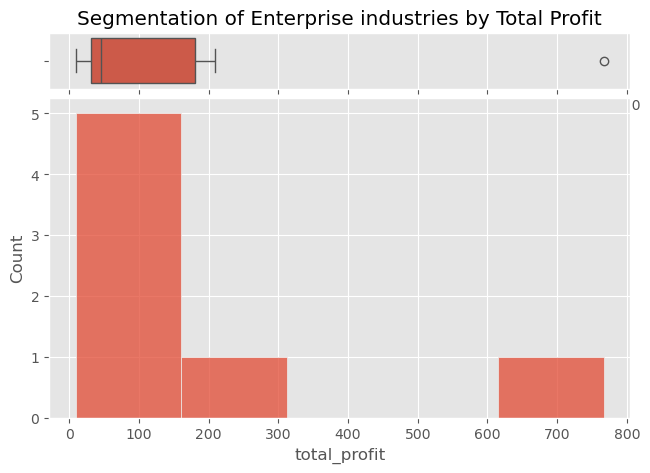

0.0000     8.9994
0.2500    31.3662
0.5000    44.8680
0.7500   180.8342
1.0000   767.2005
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 180.83 in profit
- 3 (Good) : Contributes between 44.87 and 180.83 in profit
- 2 (Marginal) : Contributes between 31.37 and 44.87 in profit
- 1 (Underperforming) : Contributes less than 31.37 in profit


In [34]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [36]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
19,EMEA,Enterprise,Misc,767.2005,0.0000,4
3,AMER,Enterprise,Tech,209.5800,0.2000,4
0,AMER,Enterprise,Communications,152.0883,0.1000,3
15,APJ,Enterprise,Manufacturing,44.8680,0.4000,2
1,AMER,Enterprise,Healthcare,38.6100,0.2000,2
18,EMEA,Enterprise,Communications,24.1224,0.0000,1
14,APJ,Enterprise,Consumer Products,8.9994,0.3000,1


In [38]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Misc in EMEA, Tech in AMER are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Communications in AMER maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Manufacturing in APJ, Healthcare in AMER, Communications in EMEA, Consumer Products in APJ are underperforming.
These Enterprise industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [30]:
###Filter negative profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the negative profits from the Enterprise segment
enterprise_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_negative_profit_metrics = enterprise_negative_profit_metrics.sort_values(by='total_profit', ascending=False)
enterprise_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount
2,AMER,Enterprise,Manufacturing,-479.9880,0.7000
20,EMEA,Enterprise,Transportation,-1731.7750,0.3500


In [33]:
query = prod5_2023[(prod5_2023['Region'] == 'EMEA') &
                         (prod5_2023['Industry'] == 'Transportation')]

query

,Order ID,Order Date,Date Key,Customer ID,Customer,Segment,Industry,Region,Subregion,Country,City,Product,Sales,Quantity,Discount,net_profit,total_discount_in_dollars,selling_price,(net)_profit_before_discount,net_profit_per_unit_sold,profit_margin,discounted_sales,month,year,year_month
3011,EMEA-2023-134845,2023-04-18,20230418,1036,FedEx,Enterprise,Transportation,EMEA,EU-EAST,Russia,Moscow,Big Ol Database,2549.9850,5,0.7000,-3399.9800,1784.9895,509.9970,-1614.9905,-679.9960,-133.3333,764.9955,4,2023,2023-04
7914,EMEA-2023-165323,2023-06-18,20230618,1090,United Parcel Service,Enterprise,Transportation,EMEA,UKIR,United Kingdom,London,Big Ol Database,3404.5000,5,0.0000,1668.2050,0.0000,680.9000,1668.2050,333.6410,49.0000,3404.5000,6,2023,2023-06


- The Enterprise segment suffers from losses from the Transportation and Manufacturing sectors. From previous analysis, Transportation, which holds a significant share in Net Revenue (46.52%) and Total Sales (49.84%) for the Enterprise segment, shows the largest negative Net Profit (-$-1731.8) but potential value with a positive Undiscounted Net Profit ($53.2). From a query, it is know that losses is due to a customer identified earlier in the analysis (FedEx, in April), which received a 70% discount. In addition, Manufacturing also hold a significant share in Quantity purchases for the Enterprise segement (17.78%), but face financial challenges with Net Profits of -480. Again, due to 70% discount.
- To address the Enterprise segment losses, minimize discounting in EMEA's Transportation industry and AMER's Manufacturing industry. As with all underperforming industries, strategies should focus on improvement and efficiency rather than heavy marketing and discounting.

In [39]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

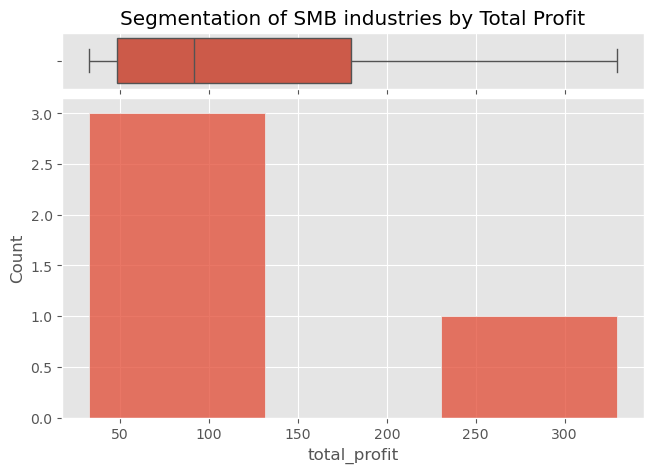

0.0000    32.3015
0.2500    47.9210
0.5000    91.6675
0.7500   180.0554
1.0000   329.5992
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 180.06 in profit
- 3 (Good) : Contributes between 91.67 and 180.06 in profit
- 2 (Marginal) : Contributes between 47.92 and 91.67 in profit
- 1 (Underperforming) : Contributes less than 47.92 in profit


In [40]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [41]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
5,AMER,SMB,Finance,329.5992,0.1000,4
6,AMER,SMB,Healthcare,130.2075,0.2000,3
21,EMEA,SMB,Finance,53.1275,0.4667,2
4,AMER,SMB,Energy,32.3015,0.2000,1


In [43]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "is the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in AMER is the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Healthcare in AMER maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Finance in EMEA, Energy in AMER are underperforming.
These SMB industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



**Key findings:**
1. All regions have strong sales periods but suffer profit declines due to heavy discounting. They also experience inactivity in certain months from low product demand. 
2. AMER region shows robust sales in January, April, July, and November. However, profits decline significantly from September through November due to heavy discounting, with no sales activity in August and December. Among the other other regions it is the only region to have a positive net profit (937.9).
3. EMEA peaks in sales in June, October, and November but sees profits dive into negative territory in April, September, and especially November. There is also a notable inactivity in sales during February, March, May, July, and August.
4. In APJ August stands out with high sales but also significant profit decline, indicating heavy discounting. Most of the year, including January, February, April, May, June, October, November, and December, shows no sales activity, suggesting prolonged periods of inactivity.
5. In the Strategic segment, Energy industries in EMEA and AMER are the highest-performing. These industries are vital for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations. To address the Strategic segment losses, minimize discounting in EMEA's Retail, AMER's Tech, and Manufacturing in EMEA and APJ.
6. For the Enterprise segment, Misc industries in EMEA and Tech industries in AMER are top-performing. To address the Enterprise segment losses, minimize discounting in EMEA's Transportation industry and AMER's Manufacturing industry.
7. In the SMB segment, Finance industries in AMER stands out.